In [1]:
import datetime

In [2]:
import sklearn
import pandas as pd
import numpy as np

In [3]:
from IPython.display import HTML

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [5]:
%matplotlib inline

In [6]:
cd ..

/home/scott/Documents/git/bite-me


In [7]:
from eat_it.utils import uniquehist

In [8]:
train = pd.read_csv('data/train.csv', encoding="utf-8")

In [9]:
test = pd.read_csv('data/genuinetest.csv', encoding="utf-8")

In [10]:
end_dt = datetime.datetime.strptime('2015-1-1', "%Y-%m-%d")
train['Age'] = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in train['Open Date']]
test['Age']  = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in test['Open Date']]

In [11]:
data = pd.concat((train,test))

In [12]:
data

,Age,City,City Group,Id,Open Date,P1,P10,P11,P12,P13,...,P36,P37,P4,P5,P6,P7,P8,P9,Type,revenue
0,5647,İstanbul,Big Cities,0,07/17/1999,4,5,3,5,5.0,...,3,4,4.0,2,2,5,4,5,IL,5653753
1,2513,Ankara,Big Cities,1,02/14/2008,4,5,1,5,5.0,...,0,0,4.0,1,2,5,5,5,FC,6923131
2,663,Diyarbakır,Other,2,03/09/2013,2,5,2,5,5.0,...,0,0,5.0,2,3,5,5,5,IL,2055379
3,1064,Tokat,Other,3,02/02/2012,6,10,8,10,7.5,...,12,6,6.0,4,4,10,8,10,IL,2675511
4,2063,Gaziantep,Other,4,05/09/2009,3,5,2,5,5.0,...,3,3,4.0,2,2,5,5,5,IL,4316715
5,1784,Ankara,Big Cities,5,02/12/2010,6,8,10,8,6.0,...,0,0,7.5,8,10,10,8,8,FC,5017319
6,1543,İstanbul,Big Cities,6,10/11/2010,2,5,2,5,5.0,...,4,4,4.0,1,5,5,5,5,IL,5166635
7,1290,İstanbul,Big Cities,7,06/21/2011,4,4,4,3,4.0,...,0,0,5.0,2,3,5,4,4,IL,4491607
8,1587,Afyonkarahisar,Other,8,08/28/2010,1,5,1,5,5.0,...,4,5,4.0,1,2,1,5,5,IL,4952497
9,1142,Edirne,Other,9,11/16/2011,6,10,2,10,7.5,...,0,0,7.5,6,4,10,10,10,IL,5444227


In [13]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Age'], dtype='object')

In [14]:
data = data[train.columns]

In [15]:
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753,5647
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131,2513
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379,663
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511,1064
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715,2063
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,0,0,0,0,0,0,0,0,5017319,1784
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,4,5,2,2,3,5,4,4,5166635,1543
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,0,4491607,1290
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,4,5,5,3,4,5,4,5,4952497,1587
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,0,0,0,0,0,0,0,0,5444227,1142


In [16]:
allcols = data.columns
uhistdict = {}
for col in allcols:
    x,y = uniquehist(data[col].values)
    uhistdict[col] = (x,y/sum(y))

In [17]:
Pcols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
        'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
        'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
        'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']

In [18]:
uhistdict

{'Age': (array([ 341,  362,  363,  376,  380,  391,  394,  414,  415,  419,  428,
          433,  444,  446,  448,  454,  468,  479,  489,  496,  510,  511,
          512,  514,  519,  535,  538,  540,  541,  566,  573,  574,  582,
          599,  605,  608,  609,  610,  615,  618,  622,  629,  643,  645,
          656,  663,  666,  672,  673,  679,  709,  713,  716,  728,  731,
          733,  739,  741,  751,  754,  758,  759,  770,  776,  778,  789,
          795,  805,  808,  809,  819,  824,  827,  832,  844,  866,  874,
          881,  899,  903,  906,  917,  921,  929,  937,  940,  944,  954,
          961,  972,  975,  978,  985,  994,  995, 1002, 1007, 1016, 1018,
         1023, 1032, 1034, 1037, 1050, 1059, 1064, 1065, 1066, 1071, 1077,
         1080, 1097, 1098, 1099, 1100, 1105, 1107, 1116, 1122, 1127, 1131,
         1133, 1142, 1150, 1153, 1154, 1160, 1168, 1174, 1175, 1179, 1185,
         1192, 1204, 1220, 1225, 1230, 1232, 1234, 1237, 1242, 1245, 1248,
         1255, 125

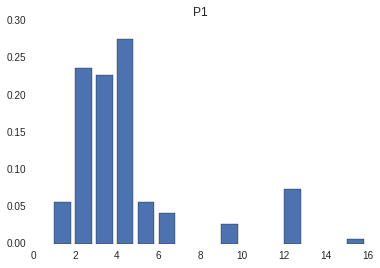

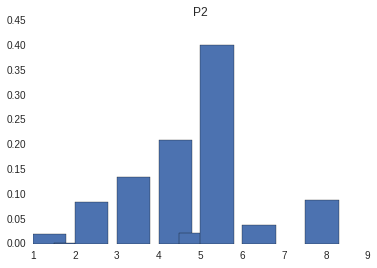

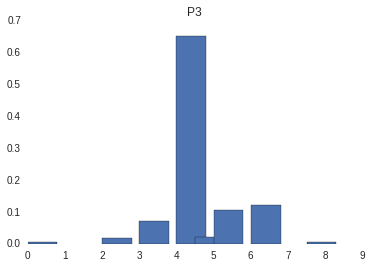

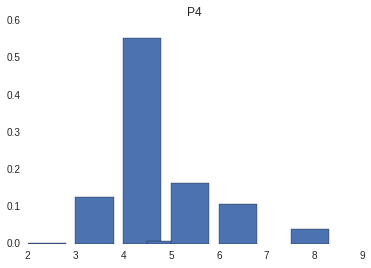

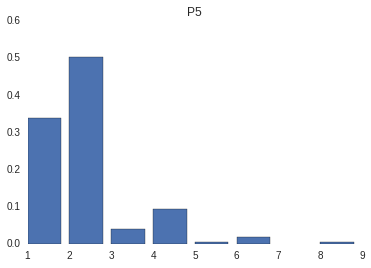

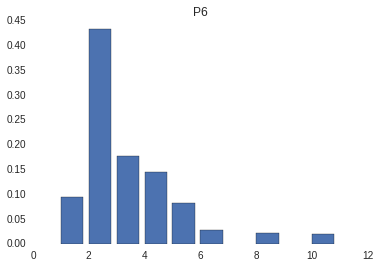

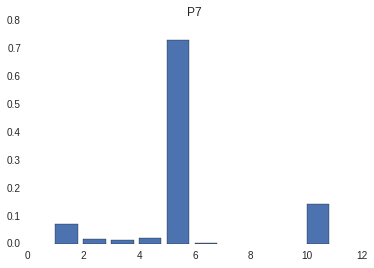

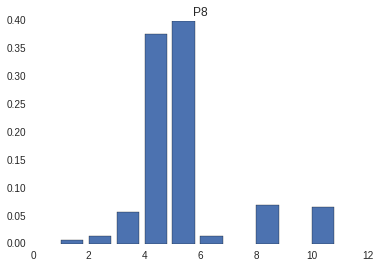

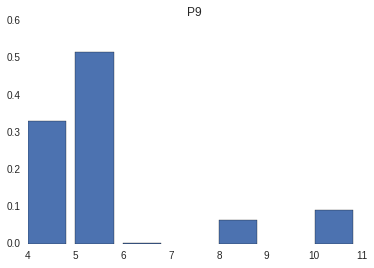

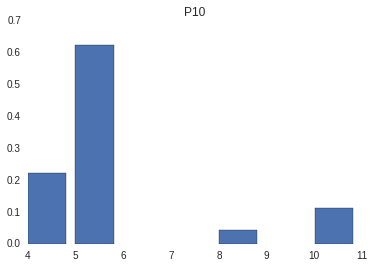

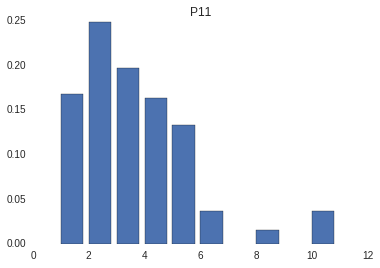

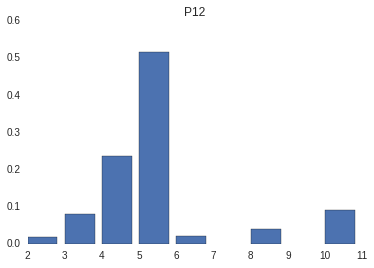

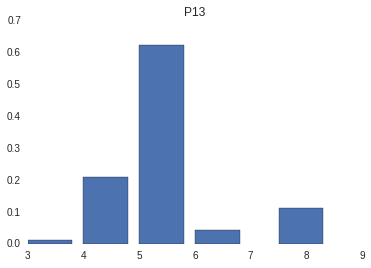

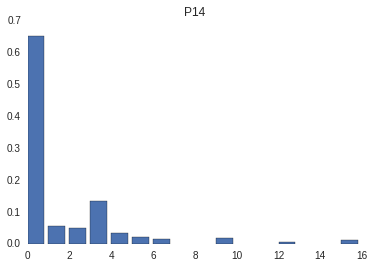

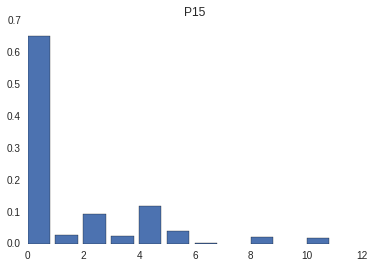

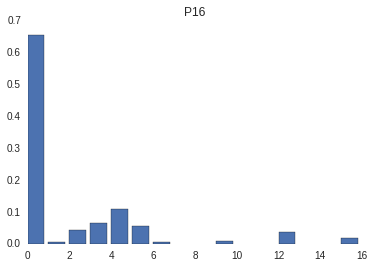

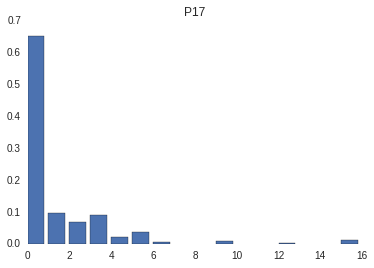

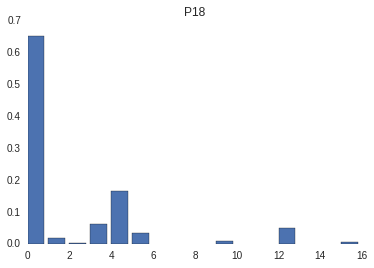

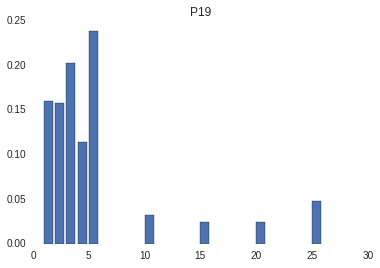

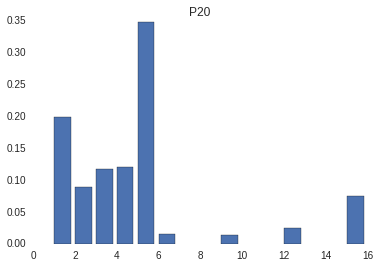

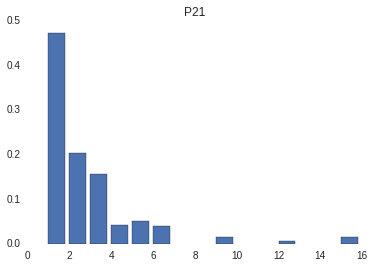

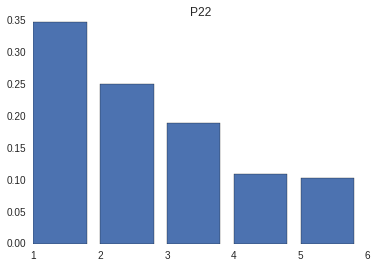

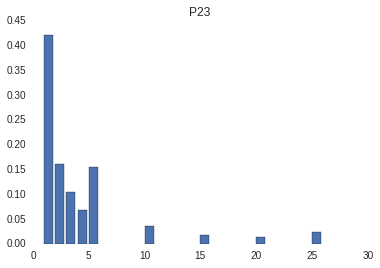

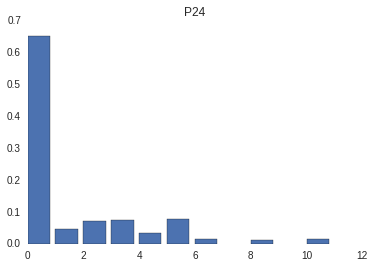

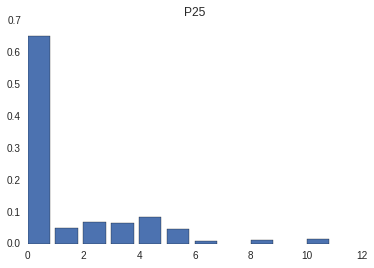

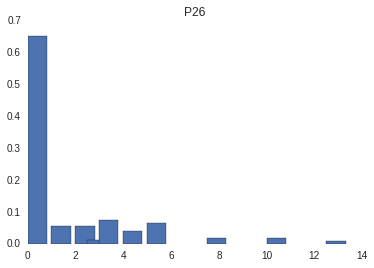

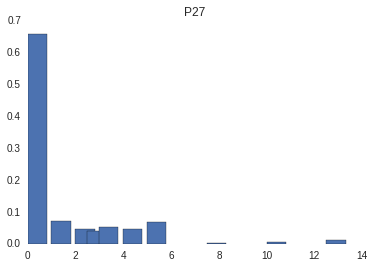

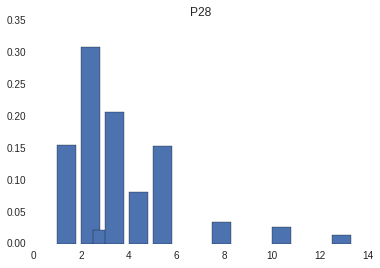

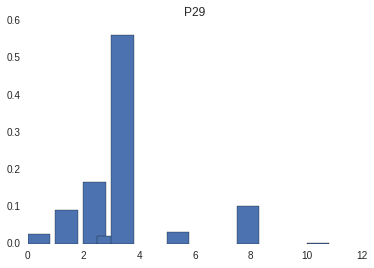

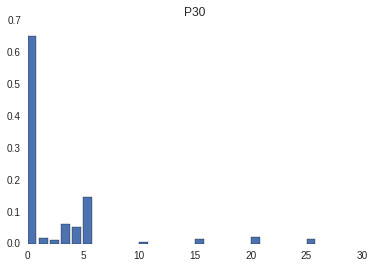

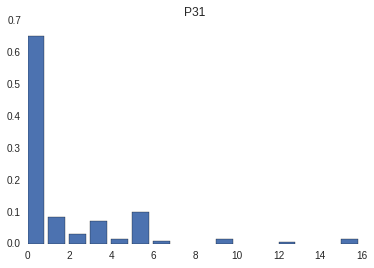

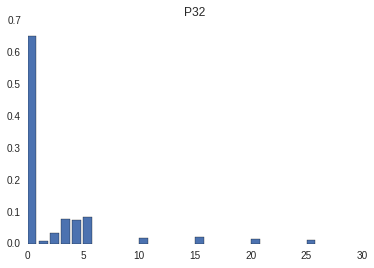

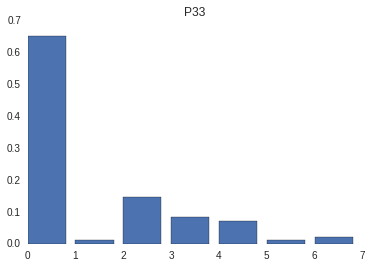

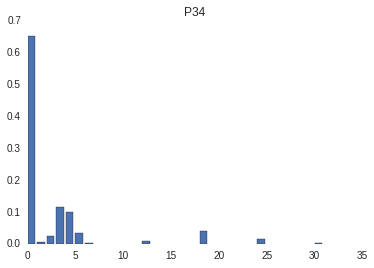

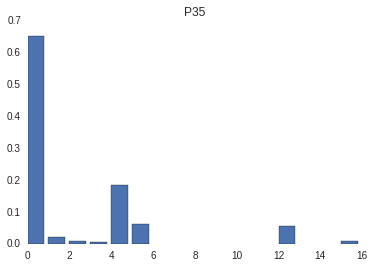

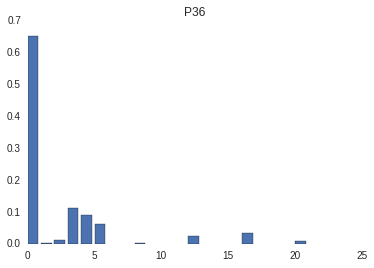

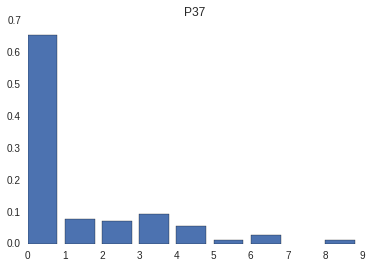

In [19]:
for col in Pcols:
    plt.bar(uhistdict[col][0],uhistdict[col][1])
    plt.title(col)
    plt.show()

weird: P7,P9,10
1-10:  P6,P8,P11,P7,P12,
1-5: 22
log: 1,P14,15,16,17,18,..,P19,20,21,23,..,24,25,26,27,28,30,31,32,34,35,36
0peak: P14,15,16,17,18,24,25,26,30,31,32,33,34,35,36,37
gauss: 2,3,8
has.5: 2,3,26,27,28,29